## Import library & Load data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

ImportError: C extension: dlopen(/Users/wee/NaTF/lib/python3.8/site-packages/pandas/_libs/interval.cpython-38-darwin.so, 2): no suitable image found.  Did find:
	/Users/wee/NaTF/lib/python3.8/site-packages/pandas/_libs/interval.cpython-38-darwin.so: mach-o, but wrong architecture
	/Users/wee/NaTF/lib/python3.8/site-packages/pandas/_libs/interval.cpython-38-darwin.so: mach-o, but wrong architecture not built. If you want to import pandas from the source directory, you may need to run 'python setup.py build_ext --inplace --force' to build the C extensions first.

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## EDA

In [52]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

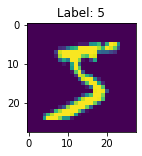

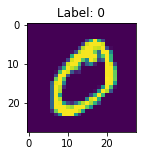

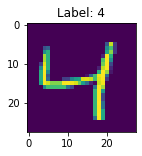

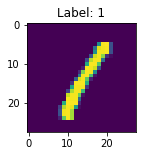

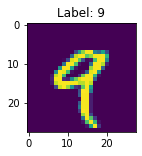

In [53]:
for i in range(0, 5):
    plt.figure(figsize=(2, 2))
    plt.imshow(x_train[i][:, :])
    plt.title(f"Label: {y_train[i]}")
    plt.show()

## Prepare data

In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype("float32")/255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype("float32")/255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


## Train & Evaluate model

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same', input_shape = (28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.35),
    
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        3

In [9]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(lr = 1e-3),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range= 10,
        zoom_range = 0.1,
        width_shift_range = 0.1,
        height_shift_range = 0.1
)

datagen.fit(x_train)

In [11]:
train_generator = datagen.flow(x_train, y_train, batch_size = 64)

validation_generator = datagen.flow(x_test, y_test, batch_size = 64)

In [12]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_loss', patience = 3, verbose = 1, factor = 0.5, min_lr = 1e-6)

model_checkpoint = ModelCheckpoint('./best_model.hdf5',monitor = 'val_loss', mode = "min", verbose = 1, save_best_model = True)

In [14]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = x_train.shape[0] // 64,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = x_test.shape[0] // 64,
    callbacks = [learning_rate_reduction, model_checkpoint]
)

model.save("mnist.h5")

ImportError: Image transformations require SciPy. Install SciPy.

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = len(accuracy)

plt.plot(range(epochs), accuracy, 'b', label='Training accuracy')
plt.plot(range(epochs), val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(range(epochs), loss, 'b', label='Training Loss')
plt.plot(range(epochs), val_loss, 'r', label='Training Loss')
plt.title('Training and validation loss')

plt.show()